<a href="https://colab.research.google.com/github/VikasAmlaha/medical-data-visualizer/blob/main/Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MEDICAL DATA VISUALIZER - by Vikas

---



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### 1. Import the data from medical_examination.csv and assign it to the df variable.

In [2]:
df = pd.read_csv('medical_examination.csv')


#### 2. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [11]:
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2) > 25
df['overweight'] = df['overweight'].astype(int)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


#### 3. Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [4]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1 if x > 1 else x)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1 if x > 1 else x)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


#### 4. Draw the Categorical Plot in the draw_cat_plot function.

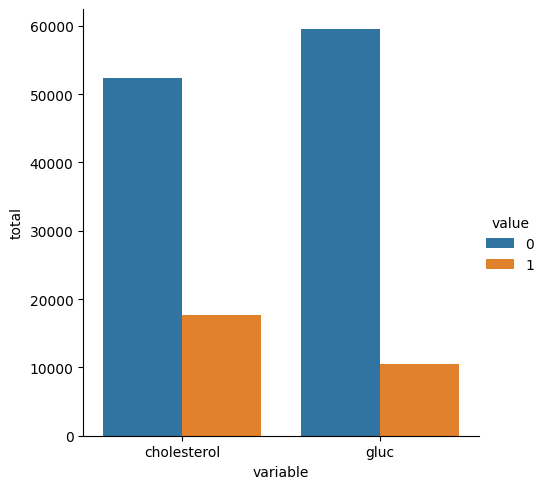

In [5]:
# Melt the dataframe to create the 'variable' and 'value' columns
df_cat = pd.melt(df, id_vars=['id'], value_vars=['cholesterol', 'gluc'],
                 var_name='variable', value_name='value')

# Group by 'variable' and 'value' and count occurrences to create 'total'
df_cat = df_cat.groupby(['variable', 'value'])['id'].count().reset_index(name='total')

# Now you can create the catplot
sns.catplot(data=df_cat, x='variable', y='total', hue='value', kind='bar')
plt.show()

#### 5. A DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.

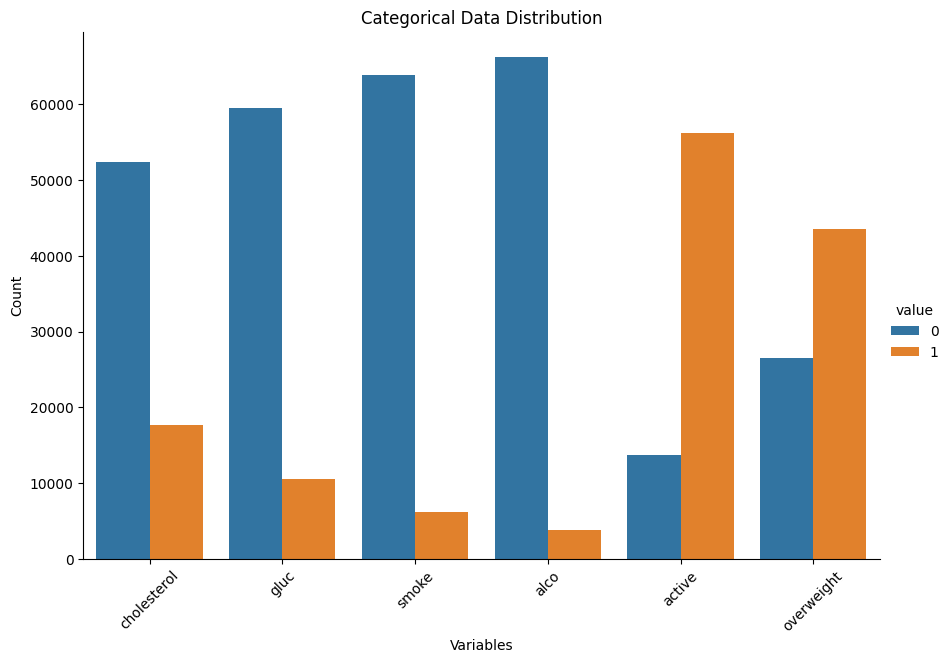

In [6]:
# Melting the DataFrame
df_cat = pd.melt(
    df,
    value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"],
    var_name="variable",
    value_name="value"
)

# Convert 'value' to string to ensure proper categorical plotting
df_cat["value"] = df_cat["value"].astype(str)

# Create a categorical plot
sns.catplot(
    data=df_cat,
    x="variable",
    hue="value",
    kind="count",
    height=6,
    aspect=1.5,
    order=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"]  # Keeps order consistent
)

# Customize the plot
plt.title("Categorical Data Distribution")
plt.xlabel("Variables")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better readability

# Show the plot
plt.show()


#### 6. Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

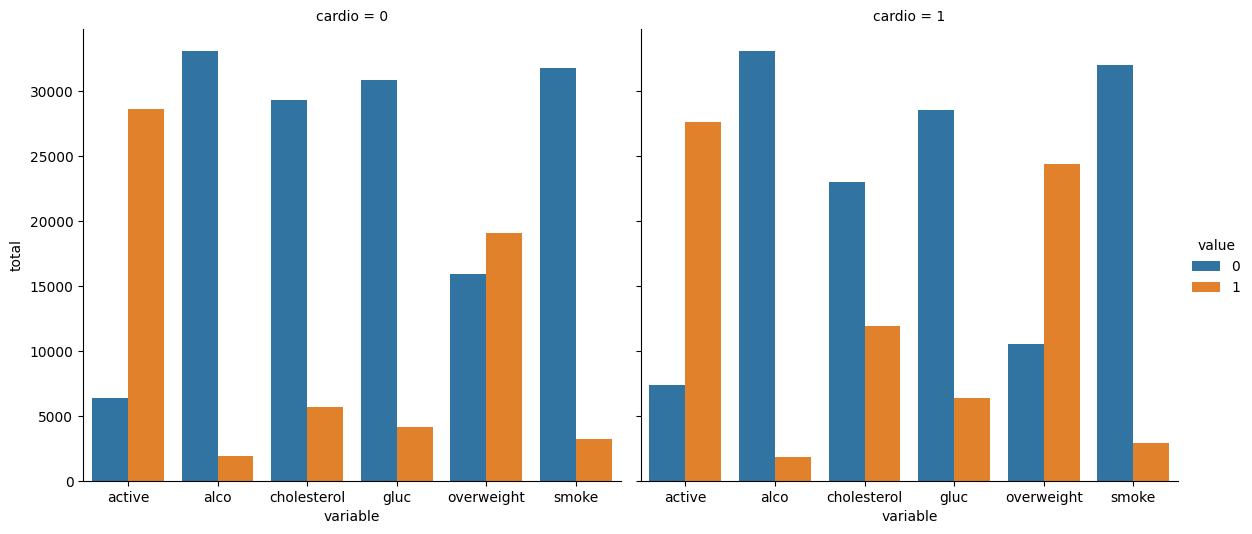

In [7]:
# Assuming df already exists with 'cardio' column
# Melting the DataFrame while keeping 'cardio'
df_cat = pd.melt(
    df,
    id_vars=["cardio"],  # Keep 'cardio' column
    value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"],
    var_name="variable",
    value_name="value"
)

# Group by 'cardio', 'variable', and 'value', then count occurrences
df_cat_grouped = df_cat.groupby(["cardio", "variable", "value"]).size().reset_index(name="total")

# Create a categorical count plot
sns.catplot(
    data=df_cat_grouped,
    x="variable",
    y="total",
    hue="value",
    col="cardio",  # Split the plot by cardio (0 or 1)
    kind="bar",
    height=6,
    aspect=1
)

# Add titles and labels
plt.subplots_adjust(top=0.85)  # Adjust layout to prevent overlapping
plt.show()

#### 7. Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().
#### 8. Get the figure for the output and store it in the fig variable.


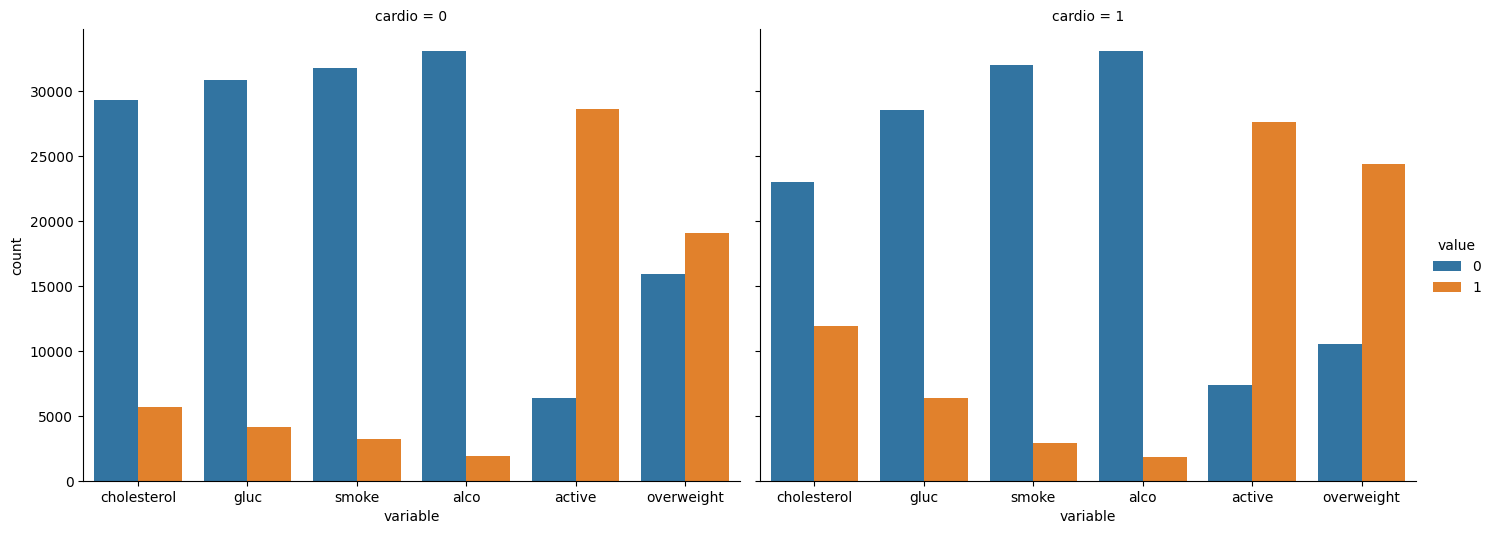

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is already defined

# Convert data into long format
df_cat = pd.melt(
    df,
    id_vars=["cardio"],
    value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"],
    var_name="variable",
    value_name="value"
)

# Create categorical count plot and store in fig
fig = sns.catplot(  # **Stored the plot in 'fig'**
    data=df_cat,
    x="variable",
    hue="value",
    kind="count",
    col="cardio",
    height=6,
    aspect=1.2
)

plt.subplots_adjust(top=0.85)  # Keep layout improvement

# **Optional: Show plot (remove if running in a script where visualization isn’t needed)**
plt.show()


#### 9. ------------------------------------------

#### 10. Draw the Heat Map in the draw_heat_map function.

<function matplotlib.pyplot.show(close=None, block=None)>

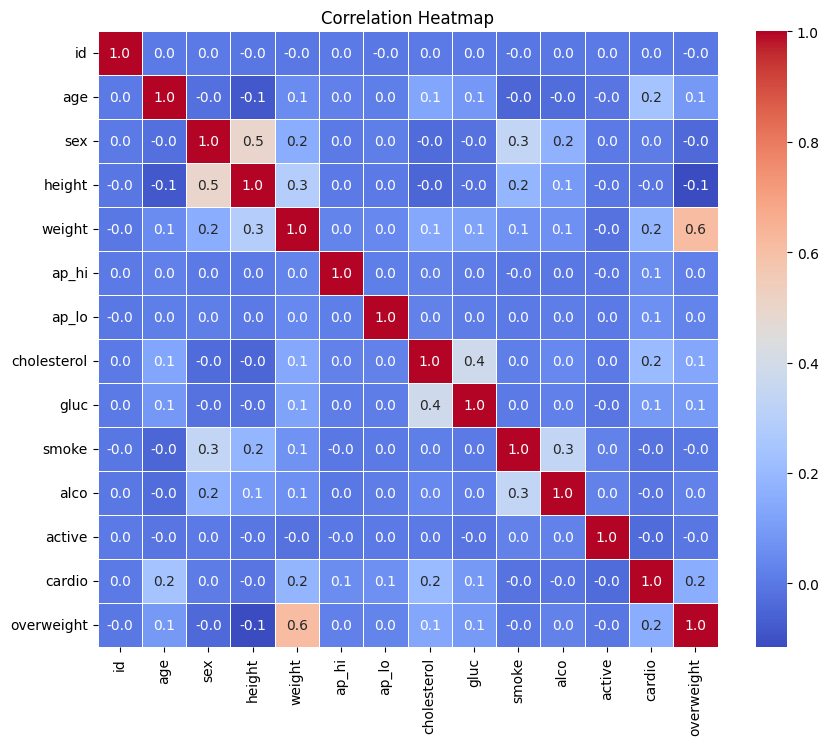

In [9]:
def draw_heat_map():
  # To calculate the correlation matrix
  corr = df.corr()
  # To set up the matplotlib figure
  fig, ax = plt.subplots(figsize=(10, 8))
  # To draw the heatmap with seaborn
  sns.heatmap(corr, annot = True, fmt = ".1f", cmap = "coolwarm", linewidths = 0.5, ax = ax)
  # To set the title
  plt.title("Correlation Heatmap")
  return fig

# Use the function draw_heat_map to draw heatmap
fig = draw_heat_map()
plt.show


#### 11.Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
* diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile

Cleaned Data Shape: (62784, 14)


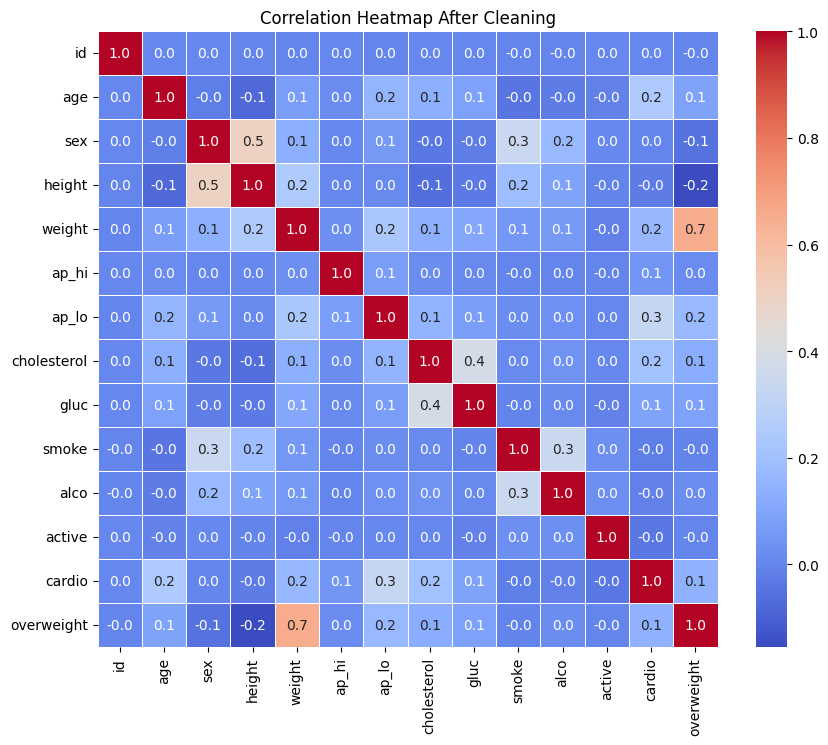

In [10]:
# Filter out incorrect data
df_heat = df[df['ap_lo'] <= df['ap_hi']]

# Remove height outliers
df_heat = df_heat[
    (df_heat['height'] >= df_heat['height'].quantile(0.025)) &
    (df_heat['height'] <= df_heat['height'].quantile(0.975))
]

# Remove weight outliers
df_heat = df_heat[
    (df_heat['weight'] >= df_heat['weight'].quantile(0.025)) &
    (df_heat['weight'] <= df_heat['weight'].quantile(0.975))
]

# Display the cleaned DataFrame shape
print("Cleaned Data Shape:", df_heat.shape)



def draw_heatmap(df):
    # Calculate the correlation matrix
    corr = df.corr()

    # Set up the figure size
    plt.figure(figsize=(10, 8))

    # Draw the heatmap
    sns.heatmap(corr, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)

    # Set the title
    plt.title("Correlation Heatmap After Cleaning")

    # Show the plot
    plt.show()

# Call the function on cleaned data
draw_heatmap(df_heat)